In [3]:
%matplotlib widget
from specsanalyzer import SpecsAnalyzer
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
spa = SpecsAnalyzer()

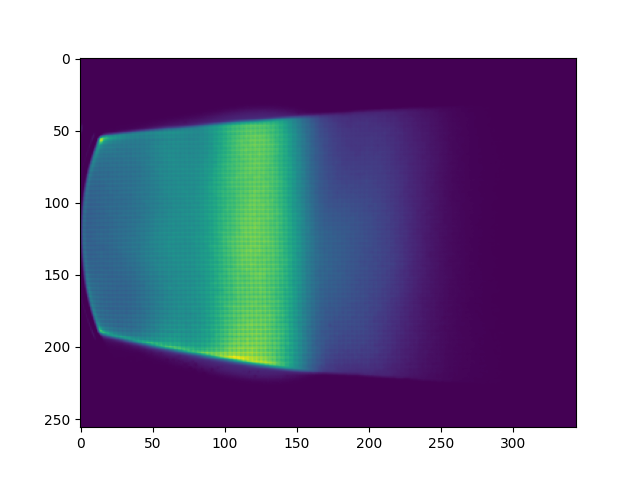

In [5]:
with open('../tests/data/dataFHI/Scan1232.tsv') as file:
    tsv_data = np.loadtxt(file, delimiter='\t')
plt.figure()
plt.imshow(tsv_data)

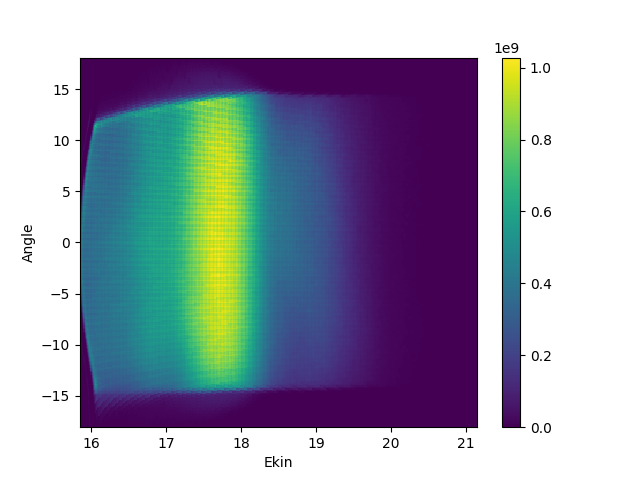

In [6]:
# Testing convert and crop on the imported data
res_xarray = spa.convert_image(tsv_data, 40, 18.5, "WideAngleMode")
plt.figure()
res_xarray.plot()

In [7]:
spa = SpecsAnalyzer(config="../tests/data/config/config.yaml")

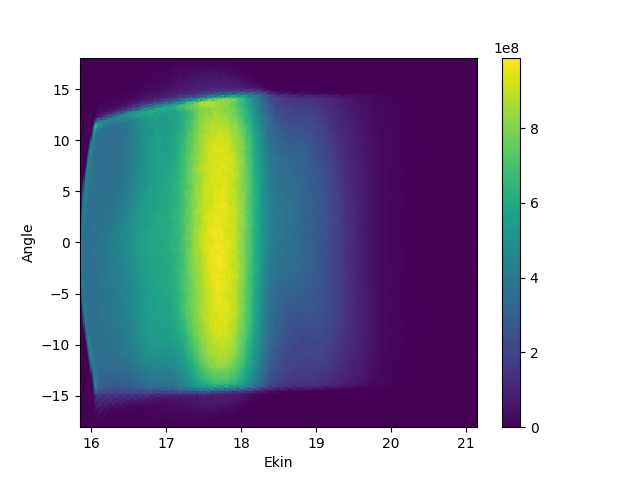

In [8]:
# Testing convert and crop on the imported data
res_xarray = spa.convert_image(tsv_data, 40, 18.5, "WideAngleMode")
plt.figure()
res_xarray.plot()

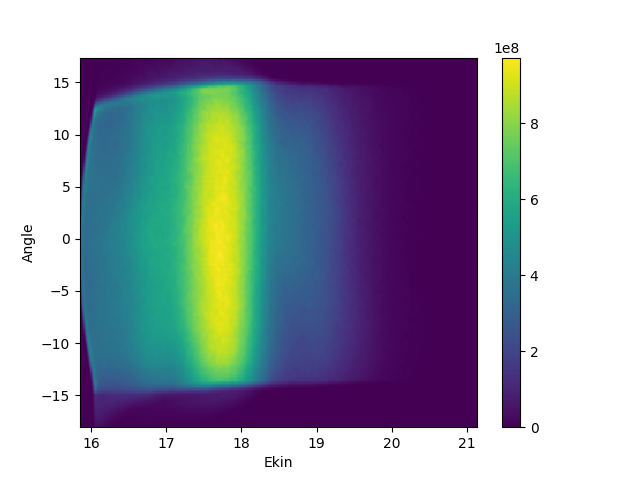

In [9]:
with open('../tests/data/dataFHI/Scan1232_converted.tsv') as file:
    ref_data = np.loadtxt(file, delimiter='\t')
    ref_data = ref_data.T
angle_axis = np.linspace(-18, 17.3077, ref_data.shape[0])
ek_axis = np.linspace(15.86, 21.1247, ref_data.shape[1])
ref_xarray = xr.DataArray(
    data=ref_data,
    coords={"Angle": angle_axis, "Ekin": ek_axis},
    dims=["Angle", "Ekin"],
)
plt.figure()
ref_xarray.plot()

In [10]:
diff_xarray = res_xarray - ref_xarray

In [14]:
res_xarray

<xarray.DataArray (Angle: 256, Ekin: 344)>
array([[8.91469004e+04, 3.24032884e+05, 0.00000000e+00, ...,
        0.00000000e+00, 1.01134594e+00, 0.00000000e+00],
       [8.91469004e+04, 3.24032884e+05, 0.00000000e+00, ...,
        1.28273509e-01, 4.02754670e-01, 4.83835559e-01],
       [8.91469004e+04, 3.24032884e+05, 0.00000000e+00, ...,
        4.26965122e-01, 8.47024652e-02, 8.53142109e-01],
       ...,
       [2.77993422e+05, 1.74839290e+05, 0.00000000e+00, ...,
        1.66955555e-01, 3.44540776e-01, 5.58482854e-01],
       [2.77993422e+05, 1.74839290e+05, 0.00000000e+00, ...,
        3.18104686e-02, 4.79045450e-01, 4.40836582e-01],
       [2.77993422e+05, 1.74839290e+05, 0.00000000e+00, ...,
        1.56836089e+04, 1.56984586e+04, 1.57131526e+04]])
Coordinates:
  * Angle    (Angle) float64 -18.0 -17.86 -17.72 -17.58 ... 17.72 17.86 18.0
  * Ekin     (Ekin) float64 15.86 15.88 15.89 15.91 ... 21.09 21.11 21.12 21.14

In [17]:
ref_xarray_reint=ref_xarray.interp_like(res_xarray)
diff_xarray = res_xarray - ref_xarray_reint

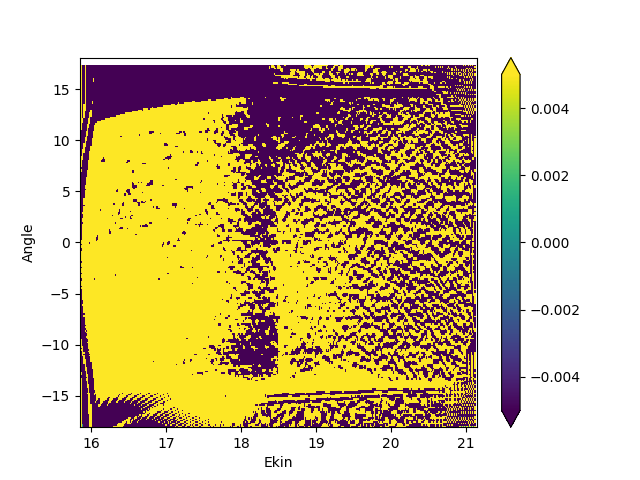

In [23]:
plt.figure()
diff_xarray.plot(vmin=-0.005, vmax=0.005)